# Plot Time Series of Raw Data

Examples of annual plots, point data extraction, and time series plots generated using the `nisar.VelocitySeries()` data.

---

### 1. Load packages

In [49]:
%load_ext autoreload
%autoreload 2
import os
import dask
import panel
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import nisardev as nisar
import grimpfunc as grimp
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
ProgressBar().register()
dask.config.set(num_workers=2)  # Avoid problems with too many open connections at NSIDC
panel.extension() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Grab ZI time series data

In [51]:
ziVelSeries = nisar.nisarVelSeries()
ziVelSeries.readSeriesFromNetCDF('../data/raw/ZachariaeIsstromVelocitySeries.nc')

: 

### 3. Plot first annual velocity maps
Notice that the data for 2015 are not perfect as this was the first Sentinel-1 acquisition year.

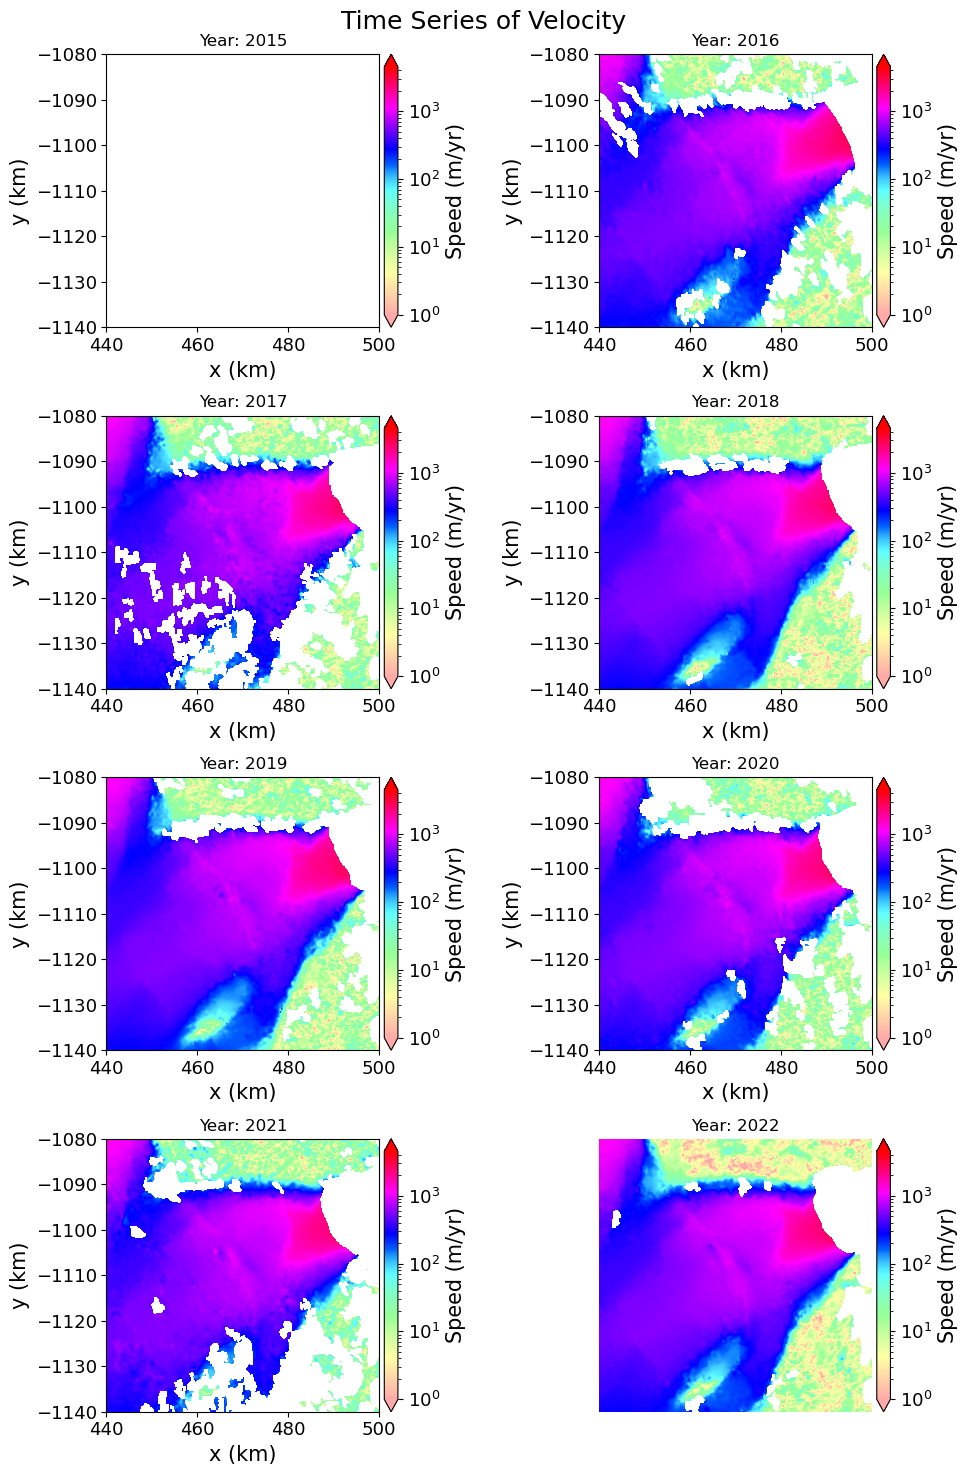

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(10,15))

# Convert myVelSeries.time to a pandas Series to extract the year
time_series = pd.Series(ziVelSeries.time)
years = time_series.dt.year.unique()

for ax, year in zip(axes.flatten(), years):
    dates_in_year = time_series[time_series.dt.year == year]
    if not dates_in_year.empty:
        ziVelSeries.displayVelForDate(date=dates_in_year.iloc[0], ax=ax, autoScale=False, vmin=1, vmax=4500, units='km', axisOff=False, scale='log')
        ax.set_title(f'Year: {year}')
axes[-1, -1].axis('off'); #remove any empty axes if odd number of years 
fig.suptitle('Time Series of Velocity', fontsize=18)
fig.tight_layout()

### 4. Grab ZI time series data and define points

In [12]:
xpts, ypts = [457794.675537/1000, 475697.184021/1000, 488900.158671/1000], [-1107613.706862/1000, -1101544.002803/1000, -1098954.829477/1000]
colors = ['r', 'orange', 'b']
symbols = ['*', '^', 'o']
labels = ['Upstream', 'Middle', 'Near terminus']

Plot one velocity image and the points.

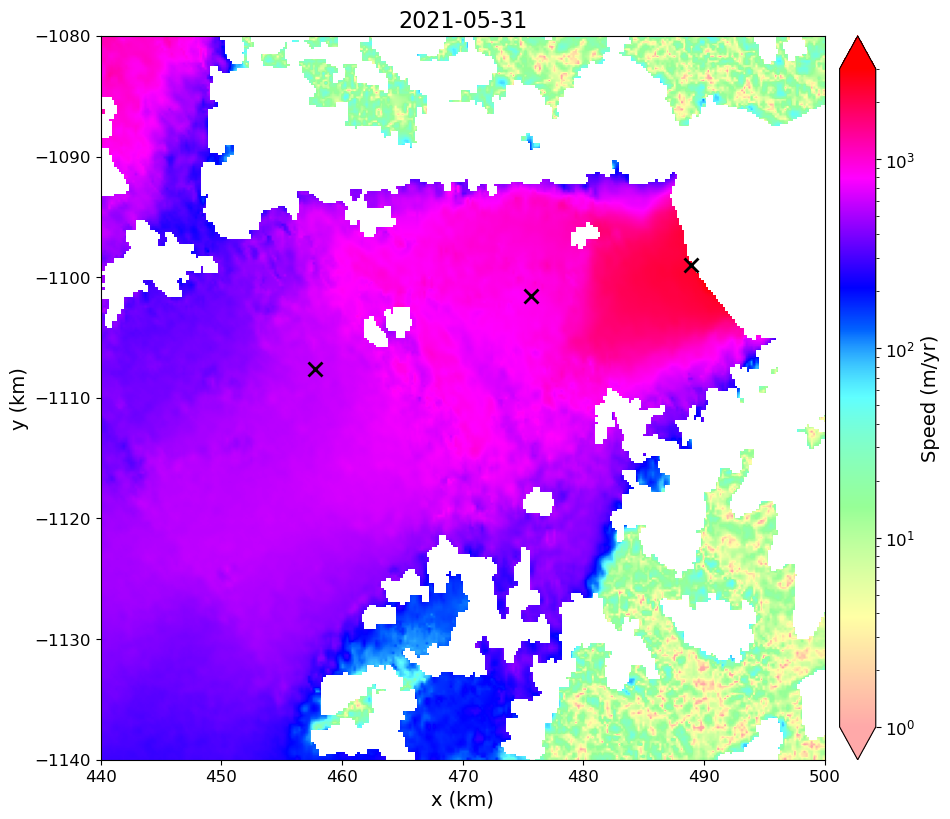

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ziVelSeries.displayVelForDate(date='2021-06-01',labelFontSize=14, plotFontSize=12, titleFontSize=16, 
                              vmin=1, vmax=3000, scale='log',colorBarPad=0.15, units='km', axisOff=False, ax=ax)
ax.plot(xpts, ypts, 'kx', markersize=10, markeredgewidth=2)

### 5. Plot the time series with the mean velocity

Some values in 2015 are zero because there is no velocity data at that point during 2015 due to the launch date.

In [14]:
velMean = ziVelSeries.mean()

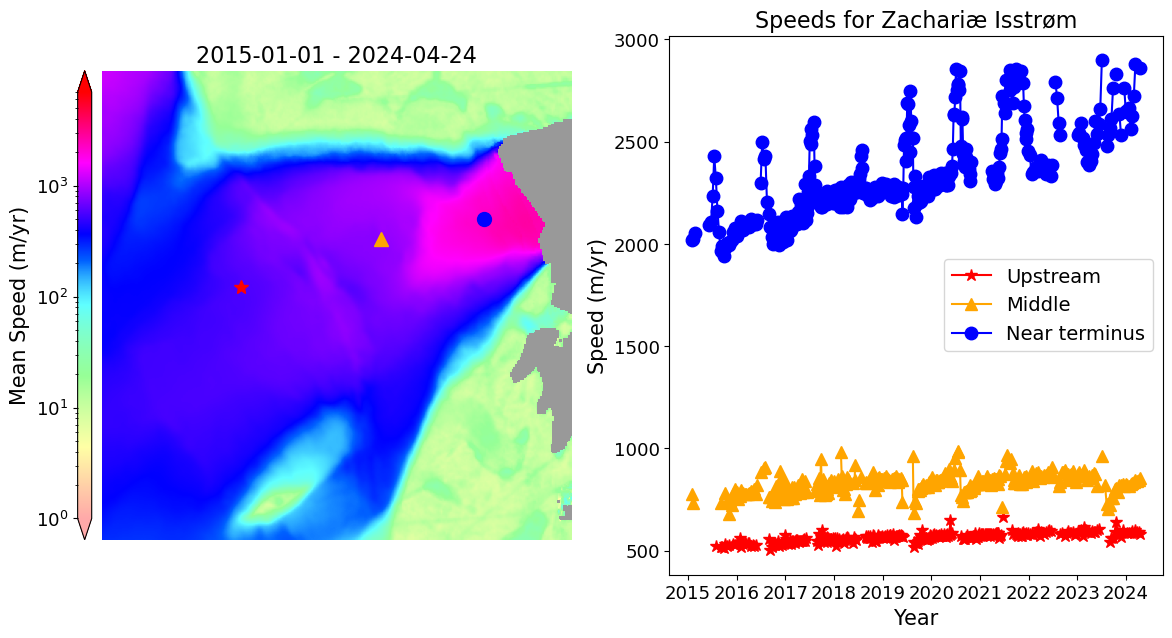

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))
mapAxes, plotAxes = axes
# Map plot
velMean.displayVelForDate(ax=mapAxes, units='km', autoScale=True, axisOff=True, scale='log',
                                 midDate=False, colorBarLabel='Mean Speed (m/yr)', 
                                 extend='both', backgroundColor=(0.6, 0.6, 0.6), colorBarPosition='left', vmin=1, colorBarSize='3%', colorBarPad=.1)
# Loop to plot points
for x, y, symbol, color, label in zip(xpts, ypts, symbols, colors, labels):
    # plot points on map
    mapAxes.plot(x, y, symbol, color=color, markersize=10) 
    # plot values only if they are not 0 or null
    ziVelSeries.plotPoint(x, y, ax=plotAxes, band='vv',  marker=symbol, color=color,  linestyle='-',
                        units='km', label=label, markersize=9)
# Finish plots
ziVelSeries.labelPointPlot(xLabel='Year', yLabel='Speed (m/yr)', ax=plotAxes, title='Speeds for Zachariæ Isstrøm')
plotAxes.legend(fontsize=14)